# AirBnB Chicago Data

Possible questions:
1. What are the most and least expensive neighborhoods?
2. Do small businesses have better ratings than hosts with a single property?
1. Can we predict price from other features?

## Import Data

In [508]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [509]:
df = pd.read_csv('./Airbnb_Chicago_listings.csv')
df.head()

C:\Users\Kevin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20191121092422,2019-11-21,"Walk to UChicago, 10 min train to McCormick Place",Visiting The University of Chicago or attendin...,"The private bedroom has a queen size bed, beds...",Visiting The University of Chicago or attendin...,none,My apartment is one block from beautiful Jacks...,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.97
1,4505,https://www.airbnb.com/rooms/4505,20191121092422,2019-11-21,One Great Apartment. 384 Great Reviews. 1 Bad ...,"We took the winter off, made things nicer arou...","We travel a lot, we know what people need. We...","We took the winter off, made things nicer arou...",none,NaN,...,t,f,moderate,f,f,1,1,0,0,2.99
2,7126,https://www.airbnb.com/rooms/7126,20191121092422,2019-11-21,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhood.,This is a very small studio apartment with a ...,A very small studio in a wonderful neighborhoo...,none,"Ukrainian Village was just named ""Hottest Neig...",...,f,f,moderate,f,f,1,1,0,0,2.93
3,9811,https://www.airbnb.com/rooms/9811,20191121092422,2019-11-21,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,"This lovely one bedroom ""hideaway"" is located ...",One-bedroom hideaway tucked into Old Town step...,none,Chicago’s Old Town neighborhood is squeezed be...,...,t,f,strict_14_with_grace_period,f,f,11,11,0,0,0.72
4,10610,https://www.airbnb.com/rooms/10610,20191121092422,2019-11-21,3 Comforts of Cooperative Living,The condo is the 2nd floor in a lovely 1912 3-...,Newly furnished with queen bed and the comfort...,The condo is the 2nd floor in a lovely 1912 3-...,none,It's a 10 minute walk from the lakefront bike ...,...,t,f,moderate,f,f,5,1,4,0,0.70


Check columns indicated in error

In [510]:
df.iloc[:, 61:63].head()

,weekly_price,monthly_price
0,$350.00,NaN
1,$925.00,NaN
2,$600.00,NaN
3,"$1,050.00","$3,400.00"
4,$235.00,$805.00


The scope of this analysis is limited to daily prices. Thus, we can safely drop these columns.

In [511]:
df.drop(['weekly_price','monthly_price'], axis=1, inplace=True)

In [512]:
df.shape

(8533, 104)

## Data Wrangling

### Remove columns that don't look useful

With so many columns, we need to look to see if we can eliminate any of them.

In [513]:
df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.533000e+03,8.533000e+03,0.0,0.0,0.0,8.533000e+03,0.0,8533.000000,8533.000000,0.0,...,7289.000000,7288.000000,7287.000000,7288.000000,7288.000000,8533.000000,8533.000000,8533.000000,8533.000000,7338.000000
mean,2.568287e+07,2.019112e+13,NaN,NaN,NaN,9.136513e+07,NaN,48.762920,48.762920,NaN,...,9.576074,9.818880,9.822012,9.691136,9.510291,11.403375,9.062815,1.908121,0.154459,2.518688
std,1.108914e+07,2.859543e+00,NaN,NaN,NaN,8.758527e+07,NaN,201.148225,201.148225,NaN,...,0.751149,0.572567,0.565276,0.660159,0.739338,23.964151,22.710551,7.186126,1.190603,2.097065
min,2.384000e+03,2.019112e+13,NaN,NaN,NaN,2.140000e+03,NaN,0.000000,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.020000
25%,1.805955e+07,2.019112e+13,NaN,NaN,NaN,1.572523e+07,NaN,1.000000,1.000000,NaN,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.860000
50%,2.769444e+07,2.019112e+13,NaN,NaN,NaN,5.597679e+07,NaN,2.000000,2.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,2.030000
75%,3.538766e+07,2.019112e+13,NaN,NaN,NaN,1.572620e+08,NaN,8.000000,8.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000,4.000000,1.000000,0.000000,3.710000
max,4.026441e+07,2.019112e+13,NaN,NaN,NaN,3.106326e+08,NaN,1820.000000,1820.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,119.000000,119.000000,73.000000,17.000000,20.830000


There are too many columns to see them all. First, let us remove those with lots of missing data.

In [514]:
half_null_cols = df.columns[df.isnull().mean() > 0.5]
half_null_cols

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate',
       'neighbourhood_group_cleansed', 'square_feet'],
      dtype='object')

In [515]:
df.drop(half_null_cols, axis=1, inplace=True)

Check for unique values. If the number for any column is close to the number of rows, it will be too strongly correlated to the price.

In [516]:
df_row_ct = df.shape[0]
unique_cols = [col for col
               in list(df)
               if df[col].nunique() == df_row_ct]
unique_cols

['id', 'listing_url']

In [517]:
df.drop(unique_cols, axis=1, inplace=True)

Also check for columns where all rows are the same. These probably are not useful.

In [518]:
redundant_cols = [col for col 
                  in list(df)
                  if df[col].nunique() == 1]
redundant_cols

['scrape_id',
 'last_scraped',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'is_business_travel_ready']

In [519]:
df.drop(redundant_cols, axis=1, inplace=True)

One of the previous rows is a URL. We don't believe any URL would be useful for our purposes. Let us check for others and drop them.

In [520]:
url_cols = [col for col in df.columns if 'url' in col]
url_cols

['picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']

In [521]:
df.drop(url_cols, axis=1, inplace=True)

We should limit the text columns to those with categorical data. Let us set a limit of 30 characters and remove any column with an average that exceeds that threshold.

In [522]:
long_cols = df.columns[df.fillna('').astype(str).apply(lambda x:x.str.len()).mean() > 30]
long_cols

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'host_about', 'host_verifications', 'amenities', 'jurisdiction_names'],
      dtype='object')

In [523]:
df.drop(long_cols, axis=1, inplace=True)

Let us check our data now.

In [524]:
df.describe()

,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.533000e+03,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8530.000000,8529.000000,8528.000000,8533.000000,...,7289.000000,7288.000000,7287.000000,7288.000000,7288.000000,8533.000000,8533.000000,8533.000000,8533.000000,7338.000000
mean,9.136513e+07,48.762920,48.762920,41.900679,-87.664596,4.331654,1.376436,1.643217,2.247420,2.248682,...,9.576074,9.818880,9.822012,9.691136,9.510291,11.403375,9.062815,1.908121,0.154459,2.518688
std,8.758527e+07,201.148225,201.148225,0.057041,0.041218,2.972712,0.779565,1.200537,1.972722,2.012976,...,0.751149,0.572567,0.565276,0.660159,0.739338,23.964151,22.710551,7.186126,1.190603,2.097065
min,2.140000e+03,0.000000,0.000000,41.650990,-87.934660,1.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.020000
25%,1.572523e+07,1.000000,1.000000,41.874500,-87.686930,2.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.860000
50%,5.597679e+07,2.000000,2.000000,41.902960,-87.661150,4.000000,1.000000,1.000000,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,2.030000
75%,1.572620e+08,8.000000,8.000000,41.940000,-87.634400,6.000000,2.000000,2.000000,3.000000,3.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000,4.000000,1.000000,0.000000,3.710000
max,3.106326e+08,1820.000000,1820.000000,42.022280,-87.537900,32.000000,21.000000,24.000000,50.000000,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,119.000000,119.000000,73.000000,17.000000,20.830000


Since this dataset was gathered through web-scraping, it includes some details about the process. Those are meaningless to us. Thus we can safely drop them.

In [525]:
#scrape_cols = [col for col in df.columns if 'scrape' in col]
#scrape_cols

In [526]:
#df.drop(scrape_cols, axis=1, inplace=True)

Let us check our text-based columns to find more to remove.

In [527]:
df.describe(include=[object])

,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,street,...,extra_people,calendar_updated,first_review,last_review,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,8533,8533,8522,7709,7709,8533,7743,8533,8533,8533,...,8533,8533,7338,7338,8533,8313,8533,8533,8533,8533
unique,2313,2295,264,4,44,2,125,2,2,27,...,63,55,1688,591,2,3797,2,5,2,2
top,Domio,2016-12-16,"Chicago, Illinois, United States",within an hour,100%,f,Lakeview,t,f,"Chicago, IL, United States",...,$0.00,today,2019-10-14,2019-11-17,t,City registration pending,f,strict_14_with_grace_period,f,f
freq,122,120,6518,6270,6008,5113,578,8514,5218,8459,...,3767,2027,45,539,8475,3044,4327,3430,8337,8307


None of these are obvious candidates for removal. There are a lot related to host details. Let us examine those more closely.

In [528]:
host_cols = [col for col in df.columns if 'host' in col]
host_cols

['host_id',
 'host_name',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

We should remove host identity details and rely solely on other details about the host.

In [529]:
df.drop(['host_id','host_name'], axis=1, inplace=True)

In [530]:
host_cols.remove('host_id')
host_cols.remove('host_name')
df[host_cols].head()

,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-08-29,"Chicago, Illinois, United States",within an hour,100%,t,Hyde Park,1,1,t,t,1,0,1,0
1,2008-12-29,"Chicago, Illinois, United States",within a few hours,100%,t,Little Village,1,1,t,t,1,1,0,0
2,2009-05-19,"Chicago, Illinois, United States",within an hour,100%,t,Ukrainian Village,2,2,t,f,1,1,0,0
3,2009-08-21,"Chicago, Illinois, United States",within an hour,94%,f,Old Town,10,10,t,t,11,11,0,0
4,2008-08-16,"Aurora, Illinois, United States",within an hour,75%,f,Hyde Park,5,5,t,t,5,1,4,0


In [531]:
df.drop(['host_location','host_total_listings_count','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

Now let us review columns with "review in the name

In [532]:
review_cols = [col for col in df.columns if 'review' in col]
review_cols

['number_of_reviews',
 'number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [533]:
# Examine some of the data of those columns
df[review_cols].head()

,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,176,39,2015-01-09,2019-11-13,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.97
1,390,25,2009-03-06,2019-11-10,96.0,10.0,9.0,10.0,10.0,9.0,9.0,2.99
2,370,48,2009-07-03,2019-11-04,93.0,10.0,9.0,10.0,10.0,10.0,10.0,2.93
3,49,16,2014-04-15,2019-10-23,92.0,10.0,9.0,10.0,9.0,10.0,9.0,0.72
4,43,11,2014-10-25,2019-10-28,82.0,8.0,7.0,9.0,9.0,10.0,9.0,0.70


In [534]:
# Drop the ones the don't look useful
df.drop(['first_review','last_review','reviews_per_month'], axis=1, inplace=True)

Check the remaining data.

In [535]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2008-08-29,within an hour,100%,t,Hyde Park,1,t,t,"Chicago, IL, United States",Hyde Park,...,10.0,10.0,10.0,10.0,t,NaN,f,strict_14_with_grace_period,f,f
1,2008-12-29,within a few hours,100%,t,Little Village,1,t,t,"Chicago, IL, United States",Little Village,...,10.0,10.0,9.0,9.0,t,R19000037538,t,moderate,f,f
2,2009-05-19,within an hour,100%,t,Ukrainian Village,2,t,f,"Chicago, IL, United States",Ukrainian Village,...,10.0,10.0,10.0,10.0,t,City registration pending,f,moderate,f,f
3,2009-08-21,within an hour,94%,f,Old Town,10,t,t,"Chicago, IL, United States",Old Town,...,10.0,9.0,10.0,9.0,t,2079260,t,strict_14_with_grace_period,f,f
4,2008-08-16,within an hour,75%,f,Hyde Park,5,t,t,"Chicago, IL, United States",Hyde Park,...,9.0,9.0,10.0,9.0,t,City registration pending,t,moderate,f,f


In [536]:
df.describe()

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,...,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,8533.000000,8533.000000,8533.000000,8533.000000,8530.000000,8529.000000,8528.000000,8533.000000,8533.000000,8533.000000,...,8533.000000,8533.000000,8533.000000,7289.000000,7289.000000,7289.000000,7288.000000,7287.000000,7288.000000,7288.000000
mean,48.762920,41.900679,-87.664596,4.331654,1.376436,1.643217,2.247420,2.248682,5.577523,663.607641,...,177.255362,41.096215,17.811907,95.187817,9.732748,9.576074,9.818880,9.822012,9.691136,9.510291
std,201.148225,0.057041,0.041218,2.972712,0.779565,1.200537,1.972722,2.012976,21.054040,530.573434,...,130.468250,60.453440,22.062863,6.671592,0.668751,0.751149,0.572567,0.565276,0.660159,0.739338
min,0.000000,41.650990,-87.934660,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.000000,41.874500,-87.686930,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,...,64.000000,3.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.000000,41.902960,-87.661150,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1125.000000,...,162.000000,17.000000,9.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,8.000000,41.940000,-87.634400,6.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1125.000000,...,323.000000,54.000000,27.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,1820.000000,42.022280,-87.537900,32.000000,21.000000,24.000000,50.000000,16.000000,1000.000000,9000.000000,...,365.000000,603.000000,279.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Drop more unnecessary columns

In [537]:
df.drop(['latitude','longitude','minimum_nights','maximum_nights'], axis=1, inplace=True)

Check availability columns

In [538]:
avail_cols = [col for col in df.columns if 'avail' in col]
avail_cols

['availability_30', 'availability_60', 'availability_90', 'availability_365']

In [539]:
df[avail_cols].head()

,availability_30,availability_60,availability_90,availability_365
0,21,44,74,349
1,11,41,71,251
2,10,28,56,328
3,10,10,14,289
4,18,48,78,258


In [540]:
df.drop(avail_cols, axis=1, inplace=True)

In [541]:
df.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,...,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,8533.000000,8533.000000,8530.000000,8529.000000,8528.000000,8533.000000,8533.000000,8533.000000,8.533000e+03,8.533000e+03,...,8.533000e+03,8533.000000,8533.000000,7289.000000,7289.000000,7289.000000,7288.000000,7287.000000,7288.000000,7288.000000
mean,48.762920,4.331654,1.376436,1.643217,2.247420,2.248682,5.322981,6.694246,1.762339e+06,2.517347e+06,...,1.947564e+06,41.096215,17.811907,95.187817,9.732748,9.576074,9.818880,9.822012,9.691136,9.510291
std,201.148225,2.972712,0.779565,1.200537,1.972722,2.012976,18.080120,21.713353,6.148584e+07,7.347671e+07,...,6.226890e+07,60.453440,22.062863,6.671592,0.668751,0.751149,0.572567,0.565276,0.660159,0.739338
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+01,3.000000e+01,...,3.000000e+01,3.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.125000e+03,1.125000e+03,...,1.125000e+03,17.000000,9.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,8.000000,6.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,1.125000e+03,1.125000e+03,...,1.125000e+03,54.000000,27.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,1820.000000,32.000000,21.000000,24.000000,50.000000,16.000000,500.000000,500.000000,2.147484e+09,2.147484e+09,...,2.147484e+09,603.000000,279.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Let us check minimum and maximum nights.

In [542]:
min_cols = [col for col in df.columns if 'minimum' in col]
min_cols

['minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'minimum_nights_avg_ntm']

In [543]:
df[min_cols].head()

,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm
0,2,2,1125,2.0
1,1,1,60,1.0
2,2,2,60,2.0
3,4,4,180,4.0
4,2,2,365,2.0


In [544]:
df.drop(min_cols, axis=1, inplace=True)

In [545]:
max_cols = [col for col in df.columns if 'maximum' in col]
max_cols

['maximum_maximum_nights', 'maximum_nights_avg_ntm']

In [546]:
df.drop(max_cols, axis=1, inplace=True)

In [547]:
df.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,8533.000000,8533.000000,8530.000000,8529.000000,8528.000000,8533.000000,8533.000000,8533.000000,7289.000000,7289.000000,7289.000000,7288.000000,7287.000000,7288.000000,7288.000000
mean,48.762920,4.331654,1.376436,1.643217,2.247420,2.248682,41.096215,17.811907,95.187817,9.732748,9.576074,9.818880,9.822012,9.691136,9.510291
std,201.148225,2.972712,0.779565,1.200537,1.972722,2.012976,60.453440,22.062863,6.671592,0.668751,0.751149,0.572567,0.565276,0.660159,0.739338
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.000000,4.000000,1.000000,1.000000,2.000000,1.000000,17.000000,9.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,8.000000,6.000000,2.000000,2.000000,3.000000,3.000000,54.000000,27.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,1820.000000,32.000000,21.000000,24.000000,50.000000,16.000000,603.000000,279.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [548]:
df.describe(include=[object])

,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,security_deposit,cleaning_fee,extra_people,calendar_updated,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,8533,7709,7709,8533,7743,8533,8533,8533,8506,8533,...,6447,7697,8533,8533,8533,8313,8533,8533,8533,8533
unique,2295,4,44,2,125,2,2,27,89,75,...,76,190,63,55,2,3797,2,5,2,2
top,2016-12-16,within an hour,100%,f,Lakeview,t,f,"Chicago, IL, United States",Lakeview,West Town,...,$0.00,$50.00,$0.00,today,t,City registration pending,f,strict_14_with_grace_period,f,f
freq,120,6270,6008,5113,578,8514,5218,8459,645,1048,...,2934,585,3767,2027,8475,3044,4327,3430,8337,8307


Check columns with very high frequencies.

In [549]:
#freq = df['host_has_profile_pic'].value_counts().max()
#freq

In [550]:
freq_threshold = int(df.shape[0] * 0.90)
#freq_threshold
freq_cols = [col for col
             in list(df)
             if df[col].value_counts().max() >= freq_threshold]
freq_cols

['host_has_profile_pic',
 'street',
 'city',
 'state',
 'market',
 'smart_location',
 'bed_type',
 'requires_license',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [551]:
df[freq_cols].head()

,host_has_profile_pic,street,city,state,market,smart_location,bed_type,requires_license,require_guest_profile_picture,require_guest_phone_verification
0,t,"Chicago, IL, United States",Chicago,IL,Chicago,"Chicago, IL",Real Bed,t,f,f
1,t,"Chicago, IL, United States",Chicago,IL,Chicago,"Chicago, IL",Real Bed,t,f,f
2,t,"Chicago, IL, United States",Chicago,IL,Chicago,"Chicago, IL",Futon,t,f,f
3,t,"Chicago, IL, United States",Chicago,IL,Chicago,"Chicago, IL",Real Bed,t,f,f
4,t,"Chicago, IL, United States",Chicago,IL,Chicago,"Chicago, IL",Real Bed,t,f,f


In [552]:
df.drop(['host_has_profile_pic',
         'street',
         'city',
         'state',
         'market',
         'smart_location',
         'requires_license',
         'require_guest_profile_picture',
         'require_guest_phone_verification']
        , axis=1
        , inplace=True)

In [553]:
df.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'zipcode', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'calendar_updated', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'cancellation_policy'],
      dtype='object')

Examine columns where the meaning is questionable.

In [554]:
df[['neighbourhood','neighbourhood_cleansed','property_type','room_type','guests_included','extra_people','calendar_updated','license']].head()

,neighbourhood,neighbourhood_cleansed,property_type,room_type,guests_included,extra_people,calendar_updated,license
0,Hyde Park,Hyde Park,Condominium,Private room,1,$0.00,2 weeks ago,NaN
1,Little Village,South Lawndale,Apartment,Entire home/apt,2,$25.00,a week ago,R19000037538
2,Ukrainian Village,West Town,Apartment,Entire home/apt,1,$0.00,2 weeks ago,City registration pending
3,Old Town,Lincoln Park,Apartment,Entire home/apt,2,$25.00,4 weeks ago,2079260
4,Hyde Park,Hyde Park,Apartment,Private room,1,$10.00,3 months ago,City registration pending


Check "license" column values

In [555]:
df.groupby(['license'])['price'].count()

license
"City Registration Pending"    1
"City registration pending"    2
00000                          1
000000                         1
06251706                       1
                              ..
r18000036445                   1
str-12345678                   1
str-134568976                  1
y19001556                      2
“City registration pending”    5
Name: price, Length: 3797, dtype: int64

In [556]:
#df.drop(['neighbourhood'], axis=1, inplace=True)
#df.drop(['license'], axis=1, inplace=True)
df.drop(['neighbourhood','license'], axis=1, inplace=True)

Drop zipcode. Since we have the neighborhoods, this is redundant.

In [557]:
df.drop(['zipcode'], axis=1, inplace=True)

# Feature Engineering

First, let us check the numeric columns

In [558]:
df.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,8533.000000,8533.000000,8530.000000,8529.000000,8528.000000,8533.000000,8533.000000,8533.000000,7289.000000,7289.000000,7289.000000,7288.000000,7287.000000,7288.000000,7288.000000
mean,48.762920,4.331654,1.376436,1.643217,2.247420,2.248682,41.096215,17.811907,95.187817,9.732748,9.576074,9.818880,9.822012,9.691136,9.510291
std,201.148225,2.972712,0.779565,1.200537,1.972722,2.012976,60.453440,22.062863,6.671592,0.668751,0.751149,0.572567,0.565276,0.660159,0.739338
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.000000,4.000000,1.000000,1.000000,2.000000,1.000000,17.000000,9.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,8.000000,6.000000,2.000000,2.000000,3.000000,3.000000,54.000000,27.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,1820.000000,32.000000,21.000000,24.000000,50.000000,16.000000,603.000000,279.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Those look good, but we should check for missing data.

In [559]:
df.select_dtypes(include=['number']).isnull().sum()

host_listings_count               0
accommodates                      0
bathrooms                         3
bedrooms                          4
beds                              5
guests_included                   0
number_of_reviews                 0
number_of_reviews_ltm             0
review_scores_rating           1244
review_scores_accuracy         1244
review_scores_cleanliness      1244
review_scores_checkin          1245
review_scores_communication    1246
review_scores_location         1245
review_scores_value            1245
dtype: int64

In [560]:
fillna_list = ['bathrooms','bedrooms','beds']

for col in fillna_list:
    col_mean = df[col].mean()
    print('{}: {}'.format(col, col_mean))
    df[col].fillna(value = df[col].mean(), inplace=True)

bathrooms: 1.3764361078546308
bedrooms: 1.6432172587642162
beds: 2.247420262664165


In [561]:
fill_zero_list = ['review_scores_rating',
                  'review_scores_accuracy',
                  'review_scores_cleanliness',
                  'review_scores_checkin',
                  'review_scores_communication',
                  'review_scores_location',
                  'review_scores_value']

for col in fill_zero_list:
    df[col].fillna(value=0, inplace=True)

In [562]:
df.select_dtypes(include=['number']).isnull().sum()

host_listings_count            0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
guests_included                0
number_of_reviews              0
number_of_reviews_ltm          0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

Now let us check the string columns.

In [563]:
df.describe(include=[object])

,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,bed_type,price,security_deposit,cleaning_fee,extra_people,calendar_updated,instant_bookable,cancellation_policy
count,8533,7709,7709,8533,7743,8533,8533,8533,8533,8533,8533,8533,6447,7697,8533,8533,8533,8533
unique,2295,4,44,2,125,2,75,2,28,4,5,426,76,190,63,55,2,5
top,2016-12-16,within an hour,100%,f,Lakeview,f,West Town,t,Apartment,Entire home/apt,Real Bed,$150.00,$0.00,$50.00,$0.00,today,f,strict_14_with_grace_period
freq,120,6270,6008,5113,578,5218,1048,7106,4928,5772,8447,273,2934,585,3767,2027,4327,3430


### Date-based features

Convert "host_since" to the number of days counting back from today.

In [564]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_since'].head()

0   2008-08-29
1   2008-12-29
2   2009-05-19
3   2009-08-21
4   2008-08-16
Name: host_since, dtype: datetime64[ns]

In [565]:
epoch_0 = datetime.datetime(1970, 1, 1, 0, 0, 0)
epoch_0

datetime.datetime(1970, 1, 1, 0, 0)

In [566]:
df['host_since_days'] = (df['host_since'] - epoch_0) / np.timedelta64(1, 's')
df['host_since_days'].head()

0    1.219968e+09
1    1.230509e+09
2    1.242691e+09
3    1.250813e+09
4    1.218845e+09
Name: host_since_days, dtype: float64

In [567]:
df.drop(['host_since'], axis=1, inplace=True)

Let us check calendar_updated

In [568]:
df.groupby(['calendar_updated'], dropna=False).size()

calendar_updated
1 week ago         46
10 months ago      19
11 months ago      44
12 months ago      29
13 months ago      35
14 months ago      22
15 months ago      28
16 months ago      20
17 months ago      21
18 months ago      15
19 months ago      12
2 days ago        165
2 months ago      645
2 weeks ago       654
20 months ago      13
21 months ago      26
22 months ago      10
23 months ago      14
24 months ago      21
25 months ago      17
26 months ago      12
27 months ago      13
28 months ago      10
29 months ago       8
3 days ago        281
3 months ago      385
3 weeks ago       534
30 months ago       2
31 months ago      10
32 months ago       8
33 months ago       1
35 months ago       1
37 months ago       2
38 months ago       1
39 months ago       2
4 days ago        240
4 months ago      222
4 weeks ago       443
40 months ago       1
41 months ago       1
45 months ago       1
5 days ago        202
5 months ago      139
5 weeks ago       282
53 months ago  

In [569]:
#df['calendar_updated'].replace('\D+', '', regex=True).replace('\s+', '', regex=True).replace('', '1', regex=False).astype(int)

In [570]:
#df['calendar_updated'].replace('\d+', '', regex=True).replace('\s+', '', regex=True).str.replace('ago', '')

In [571]:
#s = df['calendar_updated']
#s

In [572]:
#s.value_counts(dropna=False)

In [573]:
def calendar_to_number(x):
    base_calendar = x.replace('\d+', '', regex=True).replace('\s+', '', regex=True).str.replace('ago', '')
    base_calendar = base_calendar.replace({'today': 0,
                                           'week': 7,
                                           'weeks': 7,
                                           'aweek': 7,
                                           'month': 30,
                                           'months': 30,
                                           'amonth': 30,
                                           'yesterday': 1,
                                           'day': 1,
                                           'days': 1})
    #print(base_calendar)
    multiplier = x.replace('\D+', '', regex=True).replace('\s+', '', regex=True).replace('', '1', regex=False).astype(int)
    #print(multiplier)
    days_since = base_calendar * multiplier
    #print(days_since)
    #return None
    return days_since

In [574]:
#calendar_to_number(s)

In [575]:
s = df['calendar_updated'].head()
s = calendar_to_number(s)
s

0    14
1     7
2    14
3    28
4    90
Name: calendar_updated, dtype: int64

In [576]:
#df.drop(['days_since_cal_updated'], axis=1, inplace=True)

In [577]:
df['days_since_cal_updated'] = calendar_to_number(df['calendar_updated']).astype(int)
df['days_since_cal_updated'].head()

0    14
1     7
2    14
3    28
4    90
Name: days_since_cal_updated, dtype: int32

In [578]:
df.drop(['calendar_updated'], axis=1, inplace=True)

### Convert to numeric

Some of these should be numeric. Let us convert those.

In [579]:
df['host_response_rate_num'] = df['host_response_rate'].str.replace('\D+', '', regex=True).astype(float)
df['host_response_rate_num'].head()

0    100.0
1    100.0
2    100.0
3     94.0
4     75.0
Name: host_response_rate_num, dtype: float64

In [580]:
df['host_response_rate_num'].isnull().sum()

824

In [581]:
df['host_response_rate_num'].fillna(value=df['host_response_rate_num'].mean(), inplace=True)

In [582]:
df.drop(['host_response_rate'], axis=1, inplace=True)

In [583]:
df['security_deposit_num'] = df['security_deposit'].str.replace('\D+', '', regex=True).astype(float)
df['security_deposit_num'].head()

0        0.0
1        0.0
2        0.0
3        NaN
4    20000.0
Name: security_deposit_num, dtype: float64

In [584]:
df['security_deposit_num'].fillna(value=df['security_deposit_num'].mean(), inplace=True)

In [585]:
df.drop(['security_deposit'], axis=1, inplace=True)

In [586]:
df['cleaning_fee_num'] = df['cleaning_fee'].str.replace('\D+', '', regex=True).astype(float)
df['cleaning_fee_num'].head()

0       0.0
1    2500.0
2       0.0
3    9500.0
4    5000.0
Name: cleaning_fee_num, dtype: float64

In [587]:
df['cleaning_fee_num'].fillna(value=df['cleaning_fee_num'].mean(), inplace=True)

In [588]:
df.drop(['cleaning_fee'], axis=1, inplace=True)

In [589]:
df['extra_people_num'] = df['extra_people'].str.replace('\D+', '', regex=True).astype(float)
df['extra_people_num'].head()

0       0.0
1    2500.0
2       0.0
3    2500.0
4    1000.0
Name: extra_people_num, dtype: float64

In [590]:
df['extra_people_num'].fillna(value=df['extra_people_num'].mean(), inplace=True)

In [591]:
df.drop(['extra_people'], axis=1, inplace=True)

In [592]:
df['price_num'] = df['price'].str.replace('\D+', '', regex=True).astype(float)
df[['price','price_num']].head()

,price,price_num
0,$50.00,5000.0
1,$117.00,11700.0
2,$80.00,8000.0
3,$150.00,15000.0
4,$35.00,3500.0


In [593]:
df[['price','price_num']].describe(include='all')

,price,price_num
count,8533,8533.000000
unique,426,NaN
top,$150.00,NaN
freq,273,NaN
mean,NaN,18054.916208
std,NaN,47418.670728
min,NaN,0.000000
25%,NaN,6500.000000
50%,NaN,10100.000000
75%,NaN,17600.000000


In [594]:
df.groupby(['price']).size()

price
$0.00          3
$1,000.00     51
$1,002.00      5
$1,095.00      1
$1,100.00      2
            ... 
$975.00        4
$98.00        28
$980.00        1
$99.00       234
$999.00       24
Length: 426, dtype: int64

In [595]:
df['price_num'].isnull().sum()

0

In [596]:
df.drop(['price'], axis=1, inplace=True)

### Convert boolean values to binary

Some columns can be converted to binary representation.

In [597]:
df['host_is_superhost'].replace({'t': 1, 'f': 0}, inplace=True)
df['host_is_superhost'].head()

0    1
1    1
2    1
3    0
4    0
Name: host_is_superhost, dtype: int64

In [598]:
df['host_is_superhost'].isnull().sum()

0

In [599]:
df['host_identity_verified'].replace({'t': 1, 'f': 0}, inplace=True)
df['host_identity_verified'].head()

0    1
1    1
2    0
3    1
4    1
Name: host_identity_verified, dtype: int64

In [600]:
df['host_identity_verified'].isnull().sum()

0

In [601]:
df['instant_bookable'].replace({'t': 1, 'f': 0}, inplace=True)
df['instant_bookable'].head()

0    0
1    1
2    0
3    1
4    1
Name: instant_bookable, dtype: int64

In [602]:
df['instant_bookable'].isnull().sum()

0

In [603]:
df['is_location_exact'].replace({'t': 1, 'f': 0}, inplace=True)
df['is_location_exact'].head()

0    1
1    1
2    1
3    1
4    1
Name: is_location_exact, dtype: int64

### Categorical data

Let us try to categorize or quantify the host response time.

In [604]:
df.groupby(['host_response_time'], dropna=False).size()

host_response_time
a few days or more      41
within a day           437
within a few hours     961
within an hour        6270
NaN                    824
dtype: int64

Let us check property type, room type and bed type

In [605]:
df.groupby(['property_type'], dropna=False).size()

property_type
Aparthotel               3
Apartment             4928
Barn                     2
Bed and breakfast       22
Boat                     5
Boutique hotel          92
Bungalow                88
Camper/RV                1
Campsite                 1
Castle                   3
Cave                     1
Condominium           1263
Cottage                  9
Dome house               2
Farm stay                1
Guest suite            204
Guesthouse              52
Hostel                  13
Hotel                   11
House                 1197
In-law                   1
Loft                   247
Other                    6
Resort                   3
Serviced apartment     147
Tiny house               3
Townhouse              226
Villa                    2
dtype: int64

Since this exercise is meant to identify investment opportunities, we won't get much value from property types with few entries.

In [606]:
#property_drop_list = ['Cave']
#df[df['property_type'].isin(property_drop_list)]

In [607]:
#property_keep_list = ['Apartment']
#df[df['property_type'].isin(property_keep_list)]

In [608]:
property_keep_list = df.groupby(['property_type'], dropna=False).size()[lambda x: x >= 10].index.to_list()
property_keep_list

['Apartment',
 'Bed and breakfast',
 'Boutique hotel',
 'Bungalow',
 'Condominium',
 'Guest suite',
 'Guesthouse',
 'Hostel',
 'Hotel',
 'House',
 'Loft',
 'Serviced apartment',
 'Townhouse']

In [609]:
df.shape

(8533, 33)

In [610]:
df = df[df['property_type'].isin(property_keep_list)]
df.shape

(8490, 33)

In [611]:
df.groupby(['room_type'], dropna=False).size()

room_type
Entire home/apt    5749
Hotel room          107
Private room       2473
Shared room         161
dtype: int64

In [612]:
df.groupby(['bed_type'], dropna=False).size()

bed_type
Airbed             30
Couch               8
Futon              26
Pull-out Sofa      20
Real Bed         8406
dtype: int64

In [613]:
df.groupby(['host_neighbourhood'], dropna=False).size()

host_neighbourhood
Albany Park        82
Andersonville      83
Archer Heights      4
Armour Square       4
Ashburn             5
                 ... 
Wicker Park       237
Woodlawn           87
Wrigleyville       60
Zephyr Cove         1
NaN               787
Length: 126, dtype: int64

In [614]:
df['is_host_in_hood'] = (df['host_neighbourhood'] == df['neighbourhood_cleansed'])
df['is_host_in_hood'].head()

0     True
1    False
2    False
3    False
4     True
Name: is_host_in_hood, dtype: bool

In [615]:
df['is_host_in_hood'] = df['is_host_in_hood'].astype(int)
df['is_host_in_hood'].head()

0    1
1    0
2    0
3    0
4    1
Name: is_host_in_hood, dtype: int32

In [616]:
df.groupby(['is_host_in_hood'], dropna=False).size()

is_host_in_hood
0    5423
1    3067
dtype: int64

In [617]:
df.drop(['host_neighbourhood'], axis=1, inplace=True)

In [618]:
df.groupby(['cancellation_policy'], dropna=False).size()

cancellation_policy
flexible                       2107
moderate                       2903
strict_14_with_grace_period    3405
super_strict_30                  24
super_strict_60                  51
dtype: int64

In [619]:
df.describe(include=object)

,host_response_time,neighbourhood_cleansed,property_type,room_type,bed_type,cancellation_policy
count,7672,8490,8490,8490,8490,8490
unique,4,75,13,4,5,5
top,within an hour,West Town,Apartment,Entire home/apt,Real Bed,strict_14_with_grace_period
freq,6238,1045,4928,5749,8406,3405


The neighbourhood column has a lot of unique values. Let us look at it more closely.

In [620]:
df.groupby(['neighbourhood_cleansed'], dropna=False).size()

neighbourhood_cleansed
Albany Park         94
Archer Heights       6
Armour Square       97
Ashburn             11
Auburn Gresham      15
                  ... 
West Lawn           16
West Pullman         2
West Ridge          93
West Town         1045
Woodlawn           105
Length: 75, dtype: int64

In [621]:
df.describe()

,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,guests_included,number_of_reviews,...,review_scores_value,instant_bookable,host_since_days,days_since_cal_updated,host_response_rate_num,security_deposit_num,cleaning_fee_num,extra_people_num,price_num,is_host_in_hood
count,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,...,8490.000000,8490.000000,8.490000e+03,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000
mean,0.400707,48.969140,0.387161,0.832980,4.334393,1.377047,1.644708,2.248084,2.251001,41.191519,...,8.124382,0.492697,1.451590e+09,56.978799,97.440039,21671.365060,6852.510663,1506.772674,18052.273263,0.361249
std,0.490071,201.628926,0.487130,0.373016,2.972320,0.780584,1.200767,1.969516,2.015785,60.548470,...,3.424301,0.499976,7.091808e+07,133.139123,8.272808,35900.317432,5713.041100,2660.718041,47504.287276,0.480391
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.218845e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,9.000000,0.000000,1.401084e+09,1.000000,98.000000,0.000000,3000.000000,0.000000,6500.000000,0.000000
50%,0.000000,2.000000,0.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,17.000000,...,10.000000,0.000000,1.453594e+09,14.000000,100.000000,20000.000000,6500.000000,1000.000000,10100.000000,0.000000
75%,1.000000,8.000000,1.000000,1.000000,6.000000,2.000000,2.000000,3.000000,3.000000,55.000000,...,10.000000,1.000000,1.509732e+09,49.000000,100.000000,25000.000000,9500.000000,2500.000000,17600.000000,1.000000
max,1.000000,1820.000000,1.000000,1.000000,32.000000,21.000000,24.000000,50.000000,16.000000,603.000000,...,10.000000,1.000000,1.574122e+09,1590.000000,100.000000,500000.000000,150000.000000,30000.000000,1000000.000000,1.000000


The minimum price is zero. How many are listed with no price?

In [622]:
df[df['price_num'] == 0]

,host_response_time,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,...,instant_bookable,cancellation_policy,host_since_days,days_since_cal_updated,host_response_rate_num,security_deposit_num,cleaning_fee_num,extra_people_num,price_num,is_host_in_hood
2647,NaN,0,1,1,Lower West Side,1,House,Private room,4,1.5,...,0,moderate,1.422490e+09,480,97.448567,0.0,0.0,2000.0,0.0,0
8120,within an hour,0,3,0,Lincoln Park,1,Apartment,Private room,2,2.0,...,1,flexible,1.559520e+09,0,98.000000,0.0,2400.0,0.0,0.0,1
8122,within an hour,0,3,0,Lincoln Park,1,Apartment,Private room,2,2.0,...,1,flexible,1.559520e+09,0,98.000000,0.0,2400.0,0.0,0.0,1


In [623]:
df.drop(df[df['price_num'] == 0].index, inplace=True)

In [624]:
df['price_num'].describe()

count       8487.000000
mean       18058.654413
std        47511.470639
min         1000.000000
25%         6600.000000
50%        10100.000000
75%        17650.000000
max      1000000.000000
Name: price_num, dtype: float64

# Exploratory Data Analysis

In [625]:
numbers_df = df.select_dtypes(include=['number'])
numbers_df.head()

,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,guests_included,number_of_reviews,...,review_scores_value,instant_bookable,host_since_days,days_since_cal_updated,host_response_rate_num,security_deposit_num,cleaning_fee_num,extra_people_num,price_num,is_host_in_hood
0,1,1,1,1,1,1.0,1.0,1.0,1,176,...,10.0,0,1.219968e+09,14,100.0,0.000000,0.0,0.0,5000.0,1
1,1,1,1,1,7,1.0,3.0,4.0,2,390,...,9.0,1,1.230509e+09,7,100.0,0.000000,2500.0,2500.0,11700.0,0
2,1,2,0,1,2,1.0,1.0,1.0,1,370,...,10.0,0,1.242691e+09,14,100.0,0.000000,0.0,0.0,8000.0,0
3,0,10,1,1,4,1.0,1.0,0.0,2,49,...,9.0,1,1.250813e+09,28,94.0,21699.705289,9500.0,2500.0,15000.0,0
4,0,5,1,1,2,1.0,1.0,1.0,1,43,...,9.0,1,1.218845e+09,90,75.0,20000.000000,5000.0,1000.0,3500.0,1


In [626]:
num_col_list = numbers_df.columns.tolist()
num_col_list.remove('price_num')
num_col_list

['host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'is_location_exact',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'host_since_days',
 'days_since_cal_updated',
 'host_response_rate_num',
 'security_deposit_num',
 'cleaning_fee_num',
 'extra_people_num',
 'is_host_in_hood']

In [627]:
plot_num = len(num_col_list)
plot_num

26

In [628]:
grid_col_ct = 5
grid_row_ct = math.ceil(plot_num / grid_col_ct)
print('Create a {} x {} grid'.format(grid_col_ct, grid_row_ct))

Create a 5 x 6 grid


In [629]:
subplot_width = 12
subplot_height = 12

In [630]:
figwidth = subplot_width * grid_col_ct
figheight = subplot_height * grid_row_ct
print('Figure dimensions: {} x {}'.format(figwidth, figheight))

Figure dimensions: 60 x 72


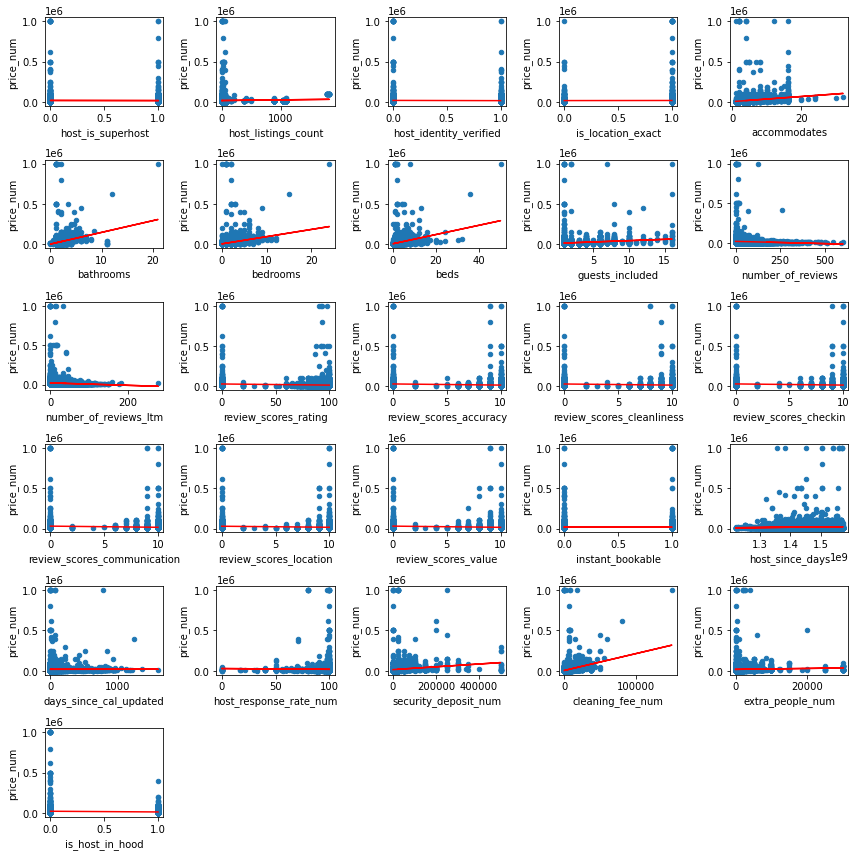

In [631]:
fig = plt.figure()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)

ax_list = []

for i, col in enumerate(num_col_list):
    ax_list.append(fig.add_subplot(grid_row_ct, grid_col_ct, i+1))
    m, b = np.polyfit(numbers_df[col], numbers_df['price_num'], 1)
    numbers_df.plot(kind = 'scatter',
                    x = col,
                    y = 'price_num',
                    figsize = (subplot_width, subplot_height),
                    ax = ax_list[i]
                   )
    ax_list[i].plot(numbers_df[col], m * numbers_df[col] + b, c='red')
    
plt.tight_layout()
plt.show()

# Outliers

<AxesSubplot:>

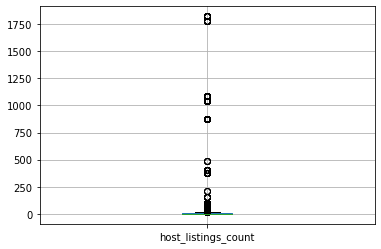

In [632]:
df.boxplot(column = 'host_listings_count')

The number of listings a host has is not very useful for potential investors. Even if we could prove that have over 10 listings yields the best prices, the average beginning investor is not able (or willing) to make that level of committment.

In [633]:
df.drop(['host_listings_count'], axis=1, inplace=True)

In [634]:
#df.boxplot('accommodates')

In [635]:
#df['accommodates'].describe()

In [636]:
def tukey_rule(data_frame, column_name):
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR
    
    return data_frame[(data_frame[column_name] >= min_value) &
                      (data_frame[column_name] <= max_value)]

In [637]:
#df = tukey_rule(df, 'accommodates')
#df['accommodates'].describe()

In [638]:
#df.max(axis=0, numeric_only=True)

In [639]:
#df['host_is_superhost'].max()

In [640]:
num_col_list = df.select_dtypes(include=['number']).columns.tolist()
num_col_list.remove('price_num')

outlier_list = []

for col in num_col_list:
    col_max = df[col].max()
    #print('The max of {} is {}'.format(col, col_max))
    if col_max > 1:
        outlier_list.append(col)
        
outlier_list

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'host_since_days',
 'days_since_cal_updated',
 'host_response_rate_num',
 'security_deposit_num',
 'cleaning_fee_num',
 'extra_people_num']

In [641]:
df[outlier_list].describe()

,accommodates,bathrooms,bedrooms,beds,guests_included,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_since_days,days_since_cal_updated,host_response_rate_num,security_deposit_num,cleaning_fee_num,extra_people_num
count,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8.487000e+03,8487.000000,8487.000000,8487.000000,8487.00000,8487.000000
mean,4.334983,1.376886,1.644818,2.248643,2.251326,41.202545,17.863320,81.334394,8.316602,8.181807,8.389183,8.390480,8.279840,8.124897,1.451568e+09,56.942382,97.439906,21679.025493,6854.36733,1507.069636
std,2.972627,0.780663,1.200933,1.969560,2.016048,60.555803,22.091873,34.127565,3.487500,3.447435,3.503568,3.504752,3.472806,3.423650,7.091056e+07,133.080573,8.274266,35904.349792,5713.15744,2661.082373
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.218845e+09,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,90.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.401062e+09,1.000000,98.000000,0.000000,3000.00000,0.000000
50%,4.000000,1.000000,1.000000,2.000000,1.000000,17.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.453594e+09,14.000000,100.000000,20000.000000,6500.00000,1000.000000
75%,6.000000,2.000000,2.000000,3.000000,3.000000,55.000000,27.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.509667e+09,49.000000,100.000000,25000.000000,9500.00000,2500.000000
max,32.000000,21.000000,24.000000,50.000000,16.000000,603.000000,279.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.574122e+09,1590.000000,100.000000,500000.000000,150000.00000,30000.000000


In [642]:
#for col in outlier_list:
#    df = tukey_rule(df, col)
#    print('The shape is now {}'.format(df.shape))

In [643]:
#df[outlier_list].describe()

The tukey method for removing outliers is too aggressive here. Using it reduced the number of rows from 8,000 to 1,000. We need to look at the columns individually.

# Stopped here

## Which are the most/least expensive neighborhoods?

In [ ]:
# Find most expensive neighborhoods
df_hoods_hi = df.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False).head(10)
df_hoods_hi.plot(kind='bar', x='neighbourhood_cleansed', y='price', figsize=(10,6))
plt.show()

In [ ]:
# Find least expensive neighborhoods
df_hoods_low = df.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True).head(10)
df_hoods_low.plot(kind='bar', x='neighbourhood_cleansed', y='price', figsize=(10,6))
plt.show()

## Do small businesses have better ratings than hosts with one property?

In [ ]:
# Look for cutoff between private owners and small businesses
df.groupby(['host_listings_count'])['review_scores_rating'].count()

In [ ]:
# Graph average rating of all host counts
df_host_compare = df.groupby(['host_listings_count'])['review_scores_rating'].mean()
df_host_compare.plot(kind='bar', x='Host Listings', y='Average Rating', figsize=(10,6))
plt.show()

## Can we predicting prices?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Check for NaN values

In [ ]:
# Find percent of columns' rows with NaN values
print("Percent of rows with NaN values")
cols_with_nan = df.columns[df.isnull().sum() > 0]
for col in cols_with_nan:
    print(col,": ",np.round(df[col].isnull().mean() * 100, decimals=2), "%")
    
df[cols_with_nan].head()

How to deal with each:

* host_response_time - dummy NaN
* host_response_rate - fill with mean
* zipcode - drop
* bathrooms - fill with mean
* bedrooms - fill with mean
* beds - fill with mean
* security_deposit - fill with mean
* cleaning_fee - fill with mean
* review_scores_rating - fill with mean
* review_scores_accuracy - fill with mean
* review_scores_cleanliness - fill with mean
* review_scores_checkin - fill with mean
* review_scores_communication - fill with mean
* review_scores_location - fill with mean
* review_scores_value - fill with mean
* reviews_per_month - fill with mean

In [ ]:
# Drop rows with missing data
df.dropna(subset=['zipcode'], axis=0, inplace=True)

In [ ]:
# Fill missing values with the mean
df.fillna(value=df.mean(), inplace=True)

### Create dummy columns

In [ ]:
# Create dummy columns for categorical variables in X
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    try:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)
    except:
        print("Cannot create dummies for ", col)
        continue

### Split data for modeling

In [ ]:
# Split your data into an X matrix and a response vector y
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create linear regression model

In [ ]:
# Instantiate a Linear Regression model with normalized data
lm_model = LinearRegression(normalize=True)
# Fit the model to the training
lm_model.fit(X_train, y_train)

In [ ]:
# Predict the response for the training and test data sets
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)

### Check the accuracy of the model

In [ ]:
# Obtain an R-squared value for both sets
train_score = r2_score(y_train_preds, y_train)
test_score = r2_score(y_test_preds, y_test)

print("R-squared scores")
print("Training set: %.2f" % train_score)
print("Test set:     %.2f" % test_score)